In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=pd.read_csv('/content/bandgap1.csv')


In [ ]:
df

,Radius(Ra),Radius(Rb),Electronegativity(A),Electronegativity(B),Ionization Energy(A),Ionization Energy(B),Ra/Rb,Molecular Weight,Electron Affinity(A),Electron Affinity(B),A_Tm,B_Tm,Boiling point(A),Boiling point(B),Density(A),Density(B),Band gap(eV)
0,103.2,55.00,1.10,1.83,5.577,7.902,1.876,242.75,48.00,15.70,918.0,1538.0,3464.0,2861.00,6.15,7.87,2.10
1,103.2,55.00,1.10,1.83,5.577,7.902,1.876,242.75,48.00,15.70,918.0,1538.0,3464.0,2861.00,6.15,7.87,2.10
2,103.2,55.00,1.10,1.83,5.577,7.902,1.876,242.75,48.00,15.70,918.0,1538.0,3464.0,2861.00,6.15,7.87,2.10
3,103.2,55.00,1.10,1.83,5.577,7.902,1.876,242.75,48.00,15.70,918.0,1538.0,3464.0,2861.00,6.15,7.87,2.10
4,119.0,66.88,2.33,1.84,7.416,7.835,1.779,384.53,35.10,34.46,327.5,2237.9,1749.0,4016.22,11.34,11.75,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,55.0,55.00,1.91,1.83,7.639,7.902,1.000,234.38,111.65,14.78,1455.0,1538.0,2730.0,2862.00,8.90,7.86,1.56
81,77.0,64.00,1.90,1.60,7.720,6.758,1.203,204.45,119.23,86.10,1085.0,2477.0,2562.0,4927.00,8.83,8.57,2.00
82,60.0,66.50,1.90,2.28,7.720,7.458,0.902,198.45,119.23,110.27,1085.0,1963.0,2562.0,3697.00,8.83,12.41,1.90
83,57.0,67.00,1.90,1.55,7.720,7.434,0.850,150.48,119.23,50.00,1085.0,1246.0,2562.0,2061.00,8.83,3.70,1.31


In [ ]:
df.shape

(85, 17)

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

**Features Selection**

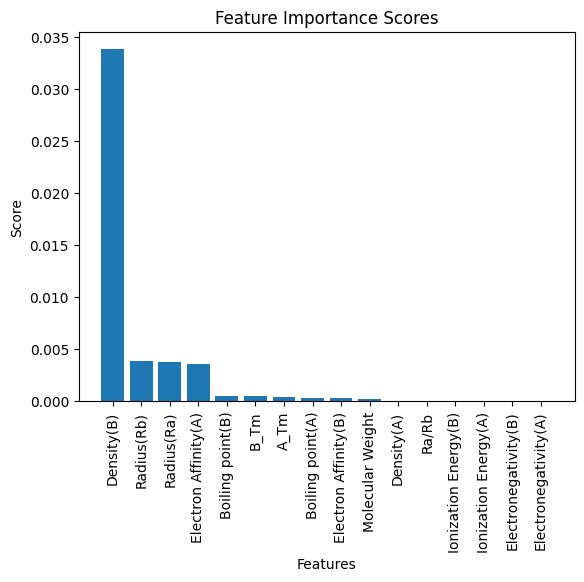

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso


X = df.drop("Band gap(eV)", axis=1).values  # Convert to NumPy array
feature_names = df.drop("Band gap(eV)", axis=1).columns

# Step 2: Create and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha value as needed
lasso.fit(X, y)

# Step 3: Retrieve feature importance scores
feature_scores = np.abs(lasso.coef_)

# Step 4: Sort feature scores and names in descending order
sorted_indices = np.argsort(feature_scores)[::-1]
sorted_scores = feature_scores[sorted_indices]
sorted_names = feature_names[sorted_indices]

# Step 5: Plot bar graph for feature vs score
plt.bar(sorted_names, sorted_scores)
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Importance Scores')
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
# pip install mrmr_selection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.8 MB/s eta 0:00:00


Selected Features:
Index(['Ionization Energy(A)', 'Electronegativity(A)', 'Electron Affinity(A)',
       'Boiling point(A)', 'A_Tm', 'Density(A)'],
      dtype='object')


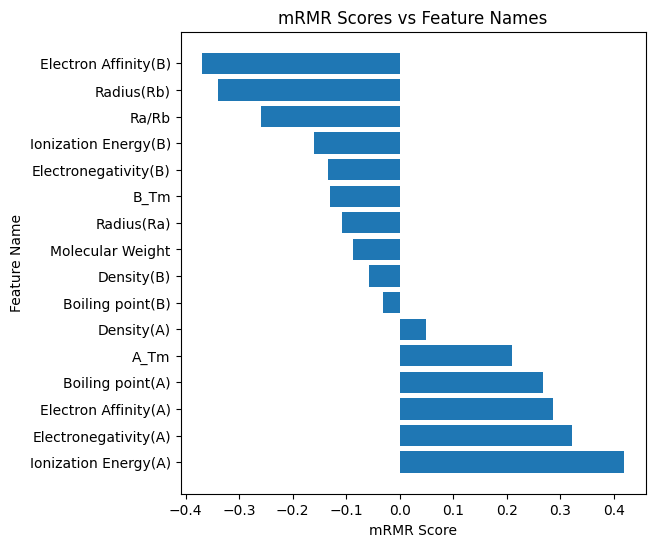

In [ ]:
# import mrmr
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.feature_selection import mutual_info_regression

# def mrmr_feature_selection(X, y, k):
#     # Compute mutual information between features and target variable
#     mi = mutual_info_regression(X, y)
#     mi /= np.max(mi)  # Normalize mutual information scores

#     # Calculate mRMR scores
#     mrmr_scores = []
#     n_features = X.shape[1]
#     for i in range(n_features):
#         mrmr_scores.append(mi[i] - (1 / k) * np.sum([mi[j] for j in range(k)]))

#     # Select top-k features with highest mRMR scores
#     top_features_indices = np.argsort(mrmr_scores)[::-1][:k]
#     top_features = X.columns[top_features_indices]

#     return top_features, mrmr_scores

# # # Load your dataset (replace with your own dataset)
# # data = pd.read_csv('/content/bandgap.csv')

# # Split the data into X (features) and y (target variable)
# X = df.drop('Band gap(eV)', axis=1)
# y = df['Band gap(eV)']

# # Set the number of features you want to select
# k = 6

# # Perform mRMR feature selection
# selected_features, mrmr_scores = mrmr_feature_selection(X, y, k)
# print("Selected Features:")
# print(selected_features)

# # Sort the mRMR scores and feature names in decreasing order
# sorted_indices = np.argsort(mrmr_scores)[::-1]
# sorted_features = X.columns[sorted_indices]
# sorted_scores = np.array(mrmr_scores)[sorted_indices]

# # Plot mRMR scores vs feature names
# plt.figure(figsize=(6, 6))
# plt.barh(sorted_features, sorted_scores)
# plt.xlabel('mRMR Score')
# plt.ylabel('Feature Name')
# plt.title('mRMR Scores vs Feature Names')
# plt.show()

# # Split the data into training and testing sets
# X_selected = X[selected_features]

In [ ]:
df.columns

Index(['Radius(Ra)', 'Radius(Rb)', 'Electronegativity(A)',
       'Electronegativity(B)', 'Ionization Energy(A)', 'Ionization Energy(B)',
       'Ra/Rb', 'Molecular Weight', 'Electron Affinity(A)',
       'Electron Affinity(B)', 'A_Tm', 'B_Tm', 'Boiling point(A)',
       'Boiling point(B)', 'Density(A)', 'Density(B)', 'Band gap(eV)'],
      dtype='object')

In [ ]:
df2 = df.drop(columns=['Radius(Ra)', 'Radius(Rb)', 'Electronegativity(B)', 'Ionization Energy(B)','Ra/Rb', 'Molecular Weight', 'Electron Affinity(B)',  'B_Tm','Boiling point(B)', 'Density(B)'])

In [ ]:
df2

,Electronegativity(A),Ionization Energy(A),Electron Affinity(A),A_Tm,Boiling point(A),Density(A),Band gap(eV)
0,1.10,5.577,48.00,918.0,3464.0,6.15,2.10
1,1.10,5.577,48.00,918.0,3464.0,6.15,2.10
2,1.10,5.577,48.00,918.0,3464.0,6.15,2.10
3,1.10,5.577,48.00,918.0,3464.0,6.15,2.10
4,2.33,7.416,35.10,327.5,1749.0,11.34,2.66
...,...,...,...,...,...,...,...
80,1.91,7.639,111.65,1455.0,2730.0,8.90,1.56
81,1.90,7.720,119.23,1085.0,2562.0,8.83,2.00
82,1.90,7.720,119.23,1085.0,2562.0,8.83,1.90
83,1.90,7.720,119.23,1085.0,2562.0,8.83,1.31


In [ ]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]
X


,Electronegativity(A),Ionization Energy(A),Electron Affinity(A),A_Tm,Boiling point(A),Density(A)
0,1.10,5.577,48.00,918.0,3464.0,6.15
1,1.10,5.577,48.00,918.0,3464.0,6.15
2,1.10,5.577,48.00,918.0,3464.0,6.15
3,1.10,5.577,48.00,918.0,3464.0,6.15
4,2.33,7.416,35.10,327.5,1749.0,11.34
...,...,...,...,...,...,...
80,1.91,7.639,111.65,1455.0,2730.0,8.90
81,1.90,7.720,119.23,1085.0,2562.0,8.83
82,1.90,7.720,119.23,1085.0,2562.0,8.83
83,1.90,7.720,119.23,1085.0,2562.0,8.83


In [ ]:
y

0     2.10
1     2.10
2     2.10
3     2.10
4     2.66
      ... 
80    1.56
81    2.00
82    1.90
83    1.31
84    1.70
Name: Band gap(eV), Length: 85, dtype: float64

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

**Random Forest regression**

Pearson Correlation Coefficient: 0.8730774615157338
RMSE: 0.31123146868364504
R2 Score: 0.7563396376723628


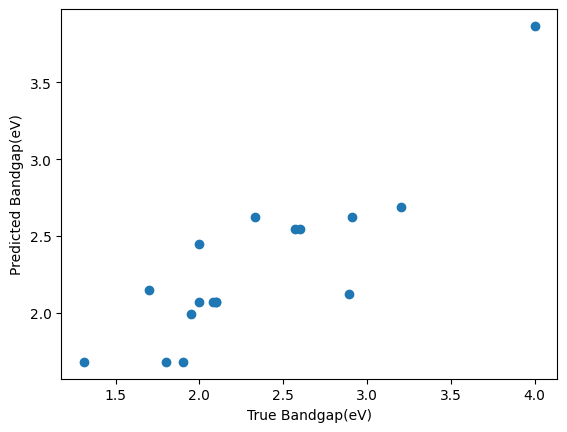

array([1.67949667, 3.86766833, 2.07236883, 2.07236883, 2.54285271,
       2.14851998, 2.62243995, 2.44589438, 1.99162781, 2.07236883,
       2.62243995, 1.67949667, 2.54285271, 1.67949667, 2.12302653,
       2.07236883, 2.68959531])

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Define important hyperparameters
hyperparameters = {
    'n_estimators': 100,   # Number of trees in the forest
    'max_depth': 5,        # Maximum depth of each tree
    'min_samples_split': 2, # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest regressor with hyperparameters
rf = RandomForestRegressor(**hyperparameters)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate Pearson correlation coefficient
corr_coef, _ = pearsonr(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Pearson Correlation Coefficient:", corr_coef)
print("RMSE:", rmse)
print("R2 Score:", r2)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("True Bandgap(eV)")
plt.ylabel("Predicted Bandgap(eV)")

plt.show()

y_pred



In [ ]:
y_test

83    1.31
36    4.00
13    2.08
31    2.10
21    2.57
84    1.70
39    2.91
32    2.00
48    1.95
8     2.00
7     2.33
73    1.90
69    2.60
74    1.80
44    2.89
1     2.10
15    3.20
Name: Band gap(eV), dtype: float64

**XGBR**

Pearson Correlation Coefficient:  0.8877559625829828
RMSE:  0.29278599287890233
R2 Score:  0.7843653872860468


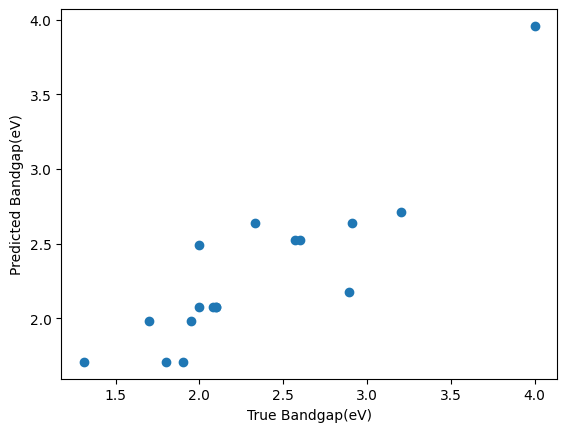

array([1.708069 , 3.9589994, 2.075484 , 2.075484 , 2.5228105, 1.9805604,
       2.6368942, 2.4887376, 1.9851453, 2.075484 , 2.6368942, 1.708069 ,
       2.5228105, 1.708069 , 2.174112 , 2.075484 , 2.7134945],
      dtype=float32)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import xgboost as xgb

# Define hyperparameters for XGBRegressor
params = {
    'n_estimators': 100,       # Number of boosting rounds
    'learning_rate': 0.1,      # Learning rate
    'max_depth': 3,            # Maximum depth of each tree
    'subsample': 0.8,          # Subsample ratio of the training instance
    'colsample_bytree': 0.8,   # Subsample ratio of columns when constructing each tree
    'objective': 'reg:squarederror',  # Objective function for regression
}

# Initialize XGBRegressor with the defined hyperparameters
model = xgb.XGBRegressor(**params)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Pearson Correlation Coefficient: ", pearson_corr)
print("RMSE: ", rmse)
print("R2 Score: ", r2)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("True Bandgap(eV)")
plt.ylabel("Predicted Bandgap(eV)")

plt.show()

y_pred



In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Feature ranking by importance:
                Feature  Importance
4      Boiling point(A)    0.505854
1  Ionization Energy(A)    0.134227
2  Electron Affinity(A)    0.132925
3                  A_Tm    0.096490
5            Density(A)    0.072226
0  Electronegativity(A)    0.058278


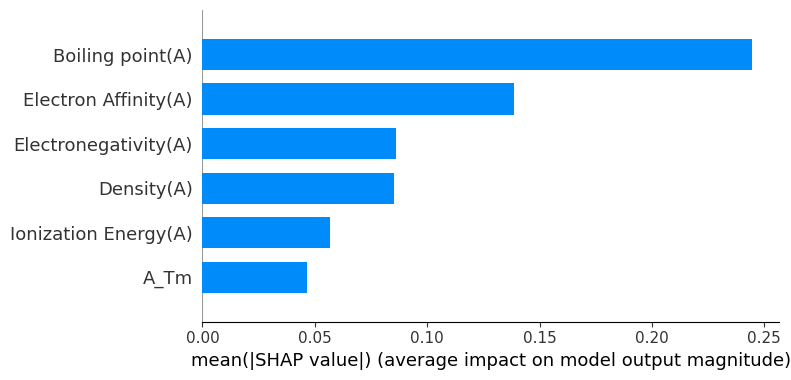

In [ ]:
import numpy as np
import pandas as pd

import shap

model = xgb.XGBRegressor(**params)
model.fit(X, y)

# Feature ranking by importance using XGBR
importance_ranking = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance_ranking = importance_ranking.sort_values('Importance', ascending=False)
print("Feature ranking by importance:")
print(importance_ranking)

# Feature ranking by Shapley values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X, plot_type="bar", show=False)


In [ ]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# fit a GAM model to the data
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X_train, y_train)

ExplainableBoostingRegressor(interactions=0)

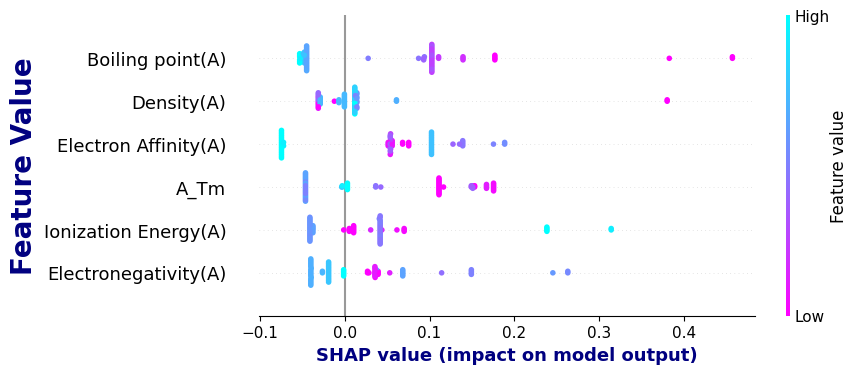

In [ ]:
import shap as shap

model = xgb.XGBRegressor(**params)
model.fit(X, y)

# Feature ranking by importance using Random Forest
importance_ranking = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance_ranking = importance_ranking.sort_values('Importance', ascending=False)

X40 = shap.utils.sample(X_train, 40)
explainer = shap.Explainer(rf.predict, X40)
shap_values = explainer(X_selected)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X40)
shap_values_ebm = explainer_ebm(X_train)

import matplotlib.pyplot as plt
font1={'family':'Times New Roman','color':'navy','fontweight':'bold','size':20}
font2={'family':'Times New Roman','color':'navy','fontweight':'bold','size':20}
plt.xlabel('SHAP Value',fontdict=font1)
plt.ylabel('Feature Value',fontdict=font2)
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values_ebm,axis_color='#000000',alpha=1,order=shap_values.abs.max(0),color=plt.get_cmap("cool_r"))

Feature ranking by importance:
                Feature  Importance
4      Boiling point(A)    0.505854
1  Ionization Energy(A)    0.134227
2  Electron Affinity(A)    0.132925
3                  A_Tm    0.096490
5            Density(A)    0.072226
0  Electronegativity(A)    0.058278


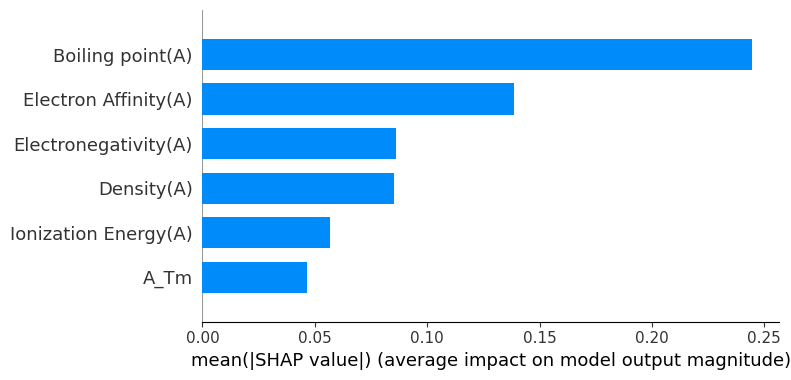

In [ ]:
import numpy as np
import pandas as pd

import shap

model = xgb.XGBRegressor(**params)
model.fit(X, y)

# Feature ranking by importance using Random Forest
importance_ranking = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance_ranking = importance_ranking.sort_values('Importance', ascending=False)
print("Feature ranking by importance:")
print(importance_ranking)

# Feature ranking by Shapley values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X, plot_type="bar", show=False)

**KNN**

Pearson correlation coefficient: 0.8814640289069167
RMSE: 0.31964134312584497
R2 score: 0.7429936965464177


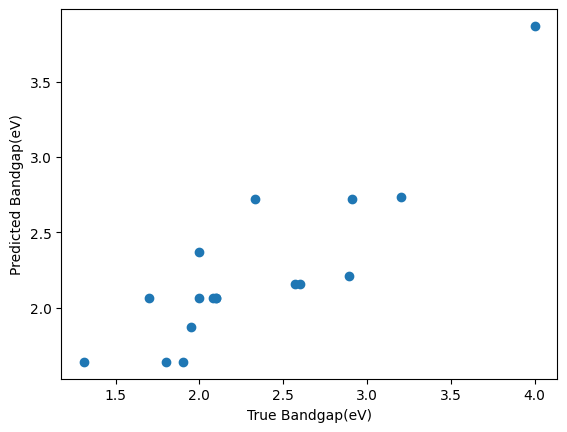

array([1.64      , 3.87      , 2.06666667, 2.06666667, 2.15666667,
       2.06666667, 2.72      , 2.36666667, 1.87      , 2.06666667,
       2.72      , 1.64      , 2.15666667, 1.64      , 2.21      ,
       2.06666667, 2.73333333])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Define hyperparameters for KNN
n_neighbors = 1  # Number of neighbors to consider
weights = 'uniform'  # Weighting scheme for neighbors (uniform or distance)

# Initialize KNN regressor with the chosen hyperparameters
knn = KNeighborsRegressor(n_neighbors=3,weights = weights)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = knn.predict(X_test)

# Calculate the Pearson correlation coefficient
corr_coef_ = pearsonr(y_test, y_pred)

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Pearson correlation coefficient:", corr_coef)
print("RMSE:", rmse)
print("R2 score:", r2)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("True Bandgap(eV)")
plt.ylabel("Predicted Bandgap(eV)")

plt.show()

y_pred



**AdaBoost Regressor**

Pearson correlation coefficient: 0.8506880045682058
RMSE: 0.3333207118521886
R2 score: 0.7205253102684079


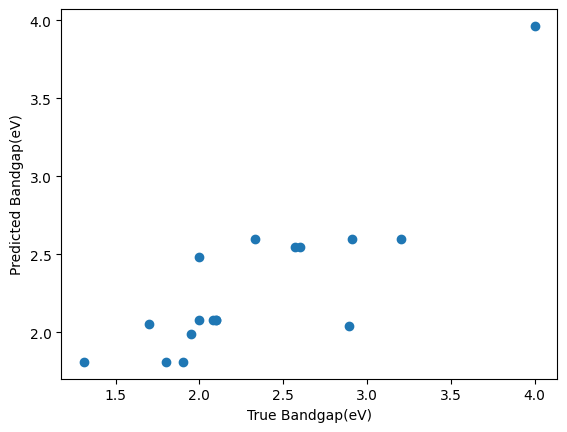

array([1.80923077, 3.965     , 2.076     , 2.076     , 2.54939394,
       2.05176471, 2.59642857, 2.48344828, 1.99      , 2.076     ,
       2.59642857, 1.80923077, 2.54939394, 1.80923077, 2.03714286,
       2.076     , 2.59642857])

In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Initialize the AdaBoost Regressor with hyperparameters
n_estimators = 100
learning_rate = 0.1
random_state = 32

# Create and fit the AdaBoost Regressor model
ada_boost = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)
ada_boost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_boost.predict(X_test)

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Pearson correlation coefficient:", pearson_corr)
print("RMSE:", rmse)
print("R2 score:", r2)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("True Bandgap(eV)")
plt.ylabel("Predicted Bandgap(eV)")

plt.show()

y_pred



**Gradient boost Regression**

Pearson Correlation Coefficient: 0.8703961406840794
RMSE: 0.31211948710264514
R2 Score: 0.7549472105151208


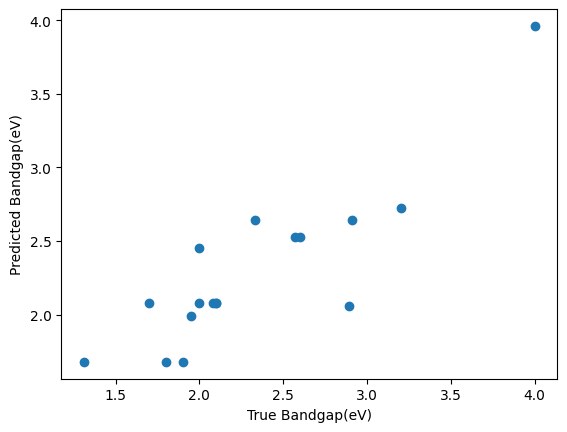

array([1.67921059, 3.96103497, 2.07678613, 2.07678613, 2.52481311,
       2.08123643, 2.64063055, 2.45343234, 1.99100917, 2.07678613,
       2.64063055, 1.67921059, 2.52481311, 1.67921059, 2.05605039,
       2.07678613, 2.72764758])

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Initialize and train the Gradient Boosting Regression model
gbr = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,  # Maximum depth of each individual tree

)
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Pearson Correlation Coefficient:", pearson_corr)
print("RMSE:", rmse)
print("R2 Score:", r2)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("True Bandgap(eV)")
plt.ylabel("Predicted Bandgap(eV)")

plt.show()

y_pred
